In [3]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
shootings = pd.read_csv("Mass_Shootings.csv", encoding = "ISO-8859-1")

In [6]:
shootings.head(5)

,S#,Title,Location,Date,Incident Area,Open/Close Location,Target,Cause,Summary,Fatalities,...,Total victims,Policeman Killed,Age,Employeed (Y/N),Employed at,Mental Health Issues,Race,Gender,Latitude,Longitude
0,1,Texas church mass shooting,"Sutherland Springs, TX",11/5/2017,Church,Close,random,unknown,"Devin Patrick Kelley, 26, an ex-air force offi...",26,...,46,0.0,26,NaN,NaN,No,White,M,NaN,NaN
1,2,Walmart shooting in suburban Denver,"Thornton, CO",11/1/2017,Wal-Mart,Open,random,unknown,"Scott Allen Ostrem, 47, walked into a Walmart ...",3,...,3,0.0,47,NaN,NaN,No,White,M,NaN,NaN
2,3,Edgewood businees park shooting,"Edgewood, MD",10/18/2017,Remodeling Store,Close,coworkers,unknown,"Radee Labeeb Prince, 37, fatally shot three pe...",3,...,6,0.0,37,NaN,Advance Granite Store,No,Black,M,NaN,NaN
3,4,Las Vegas Strip mass shooting,"Las Vegas, NV",10/1/2017,Las Vegas Strip Concert outside Mandala Bay,Open,random,unknown,"Stephen Craig Paddock, opened fire from the 32...",59,...,585,1.0,64,NaN,NaN,Unclear,White,M,36.181271,-115.134132
4,5,San Francisco UPS shooting,"San Francisco, CA",6/14/2017,UPS facility,Close,coworkers,NaN,"Jimmy Lam, 38, fatally shot three coworkers an...",3,...,5,0.0,38,1.0,NaN,Yes,Asian,M,NaN,NaN


In [7]:
shootings[['Fatalities','Race']].groupby('Race',as_index=False).count().sort_values(by='Fatalities',ascending='False')

,Race,Fatalities
14,White American or European American/Some other...,1
2,Asian American/Some other race,1
5,Black American or African American/Unknown,1
8,Other,2
10,Two or more races,2
7,Native American or Alaska Native,3
15,black,3
3,Black,5
6,Latino,5
0,Asian,6


In [8]:
shootings.replace(['White American or European American','white','White','White American or European American/Some other Race',
                   'Black American or African American','Black','black','Black American or African American/Unknown',
                  'Asian American','Asian','Asian American/Some other race',
                  'Some other race','Two or more races','Other'],
                  ['White','White','White','White',
                  'African American','African American','African American','African American',
                  'Asian','Asian','Asian',
                  'Unknown','Unknown','Unknown'],inplace=True)

In [9]:
shootings['Race'].unique()

array(['White', 'African American', 'Asian', nan, 'Latino', 'Unknown',
       'Native American or Alaska Native'], dtype=object)

In [10]:
shootings[['Fatalities','Race']].groupby('Race',as_index=False).count().sort_values(by='Fatalities',ascending=False)

,Race,Fatalities
5,White,144
0,African American,85
4,Unknown,66
1,Asian,18
2,Latino,5
3,Native American or Alaska Native,3


In [11]:
shootings.replace(['M','M/F'],['Male','Male/Female'],inplace=True)

In [12]:
shootings[['Gender','Fatalities']].groupby('Gender',as_index=False).count().sort_values(by='Fatalities',ascending=False)

,Gender,Fatalities
1,Male,292
3,Unknown,21
0,Female,5
2,Male/Female,5


Text(0, 0.5, 'Fatalities')

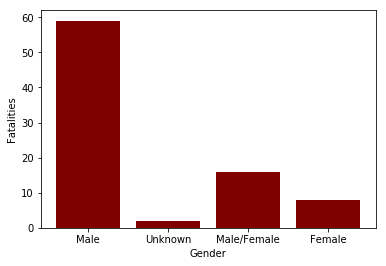

In [17]:
plt.bar(shootings['Gender'],shootings['Fatalities'],align='center',color='maroon')
plt.xlabel('Gender')
plt.ylabel('Fatalities')

In [14]:
shootings.fillna('0',inplace=True)

In [15]:
shootings['Age'].sort_values()

105     0
104     0
237     0
107     0
109     0
110     0
111     0
112     0
113     0
114     0
115     0
116     0
117     0
118     0
119     0
120     0
103     0
102     0
101     0
100     0
81      0
83      0
84      0
85      0
86      0
88      0
89      0
121     0
90      0
92      0
       ..
231    44
247    44
302    44
165    44
178    45
203    45
279    45
6      45
205    45
207    45
1      47
246    47
291    47
250    48
236    48
282    50
311    51
212    52
292    52
278    55
309    55
82     57
93     57
166    59
189    59
300    59
171    64
3      64
241    66
174    70
Name: Age, Length: 323, dtype: object

Text(0, 0.5, 'Fatalities')

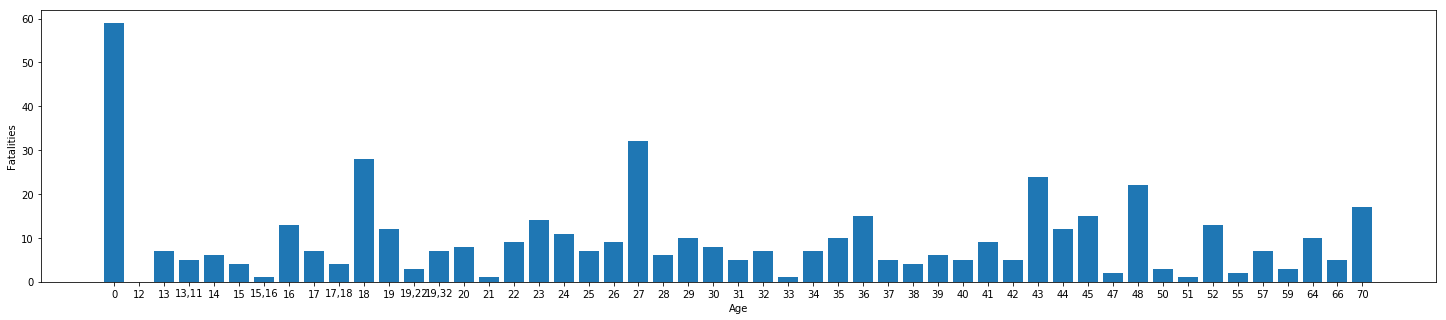

In [16]:
plt.figure(figsize=(25,5))
plt.bar(shootings['Age'].sort_values(),shootings['Fatalities'],align='center',)
plt.xlabel('Age')
plt.ylabel('Fatalities')

<BarContainer object of 323 artists>

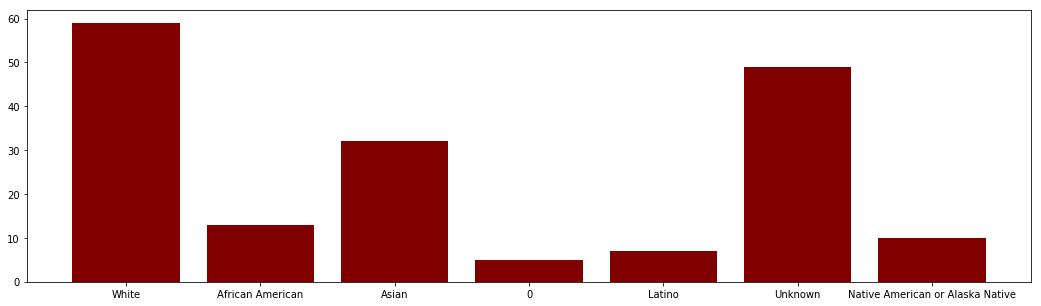

In [22]:
plt.figure(figsize=(18,5))
plt.bar(shootings['Race'],shootings['Fatalities'],align='center',color='maroon')